In [166]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime

%config InlineBackend.figure_format='retina'
plt.rc('font', family='Arial')

## Questão 1

In [3]:
# Defina os tickers para as ações que você deseja analisar
tickers = ["MSFT", "ORCL"]

# Recupere os dados dos últimos 2 meses para cada ação
data = yf.download(tickers, period="2mo")

[*********************100%***********************]  2 of 2 completed


In [4]:
data.head()

Adj Close                  Close                   High  \
                  MSFT       ORCL        MSFT       ORCL        MSFT   
Date                                                                   
2023-01-30  242.103607  87.349998  242.710007  87.349998  245.600006   
2023-01-31  247.190857  88.459999  247.809998  88.459999  247.949997   
2023-02-01  252.118515  90.050003  252.750000  90.050003  255.179993   
2023-02-02  263.938904  89.379997  264.600006  89.379997  264.690002   
2023-02-03  257.704529  89.620003  258.350006  89.620003  264.200012   

                              Low                   Open               Volume  \
                 ORCL        MSFT       ORCL        MSFT       ORCL      MSFT   
Date                                                                            
2023-01-30  88.620003  242.199997  86.989998  244.509995  88.470001  25867400   
2023-01-31  88.480003  242.949997  87.349998  243.449997  87.690002  26541100   
2023-02-01  90.650002  245.470001  88.209999  248.000000  88.370003  31259900   
2023-02-02  91.220001  257.250000  88.949997  258.820007  90.660004  39940400   
2023-02-03  90.260002  257.100006  88.269997  259.540009  88.470001  29077300   

                     
               ORCL  
Date                 
2023-01-30  6255300  
2023-01-31  6200400  
2023-02-01  6141300  
2023-02-02  8269200  
2023-02-03  5671800

In [5]:
# Calcula a diferença de preço diária (em porcentagem) para cada ação nos últimos 2 meses
df_dif_diaria = ((data["Close"] / data["Open"]) - 1) * 100
df_dif_diaria.index = [datetime.fromtimestamp(a.timestamp()).strftime('%d-%m-%y') for a in df_dif_diaria.index.to_pydatetime()]
df_dif_diaria.head()

,MSFT,ORCL
30-01-23,-0.736161,-1.265969
31-01-23,1.790922,0.878089
01-02-23,1.915323,1.901098
02-02-23,2.233212,-1.411876
03-02-23,-0.458504,1.299877


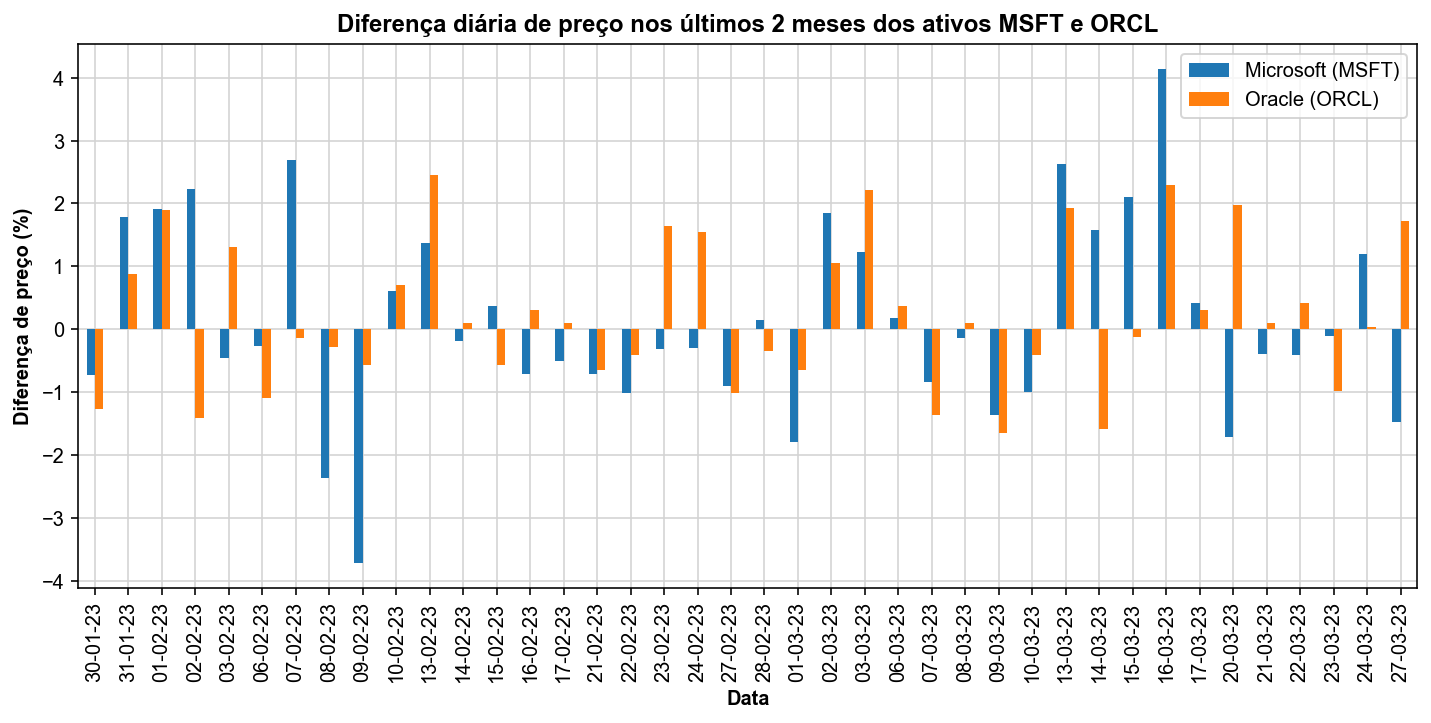

In [17]:
ax = df_dif_diaria.plot.bar(zorder=2)
plt.rcParams["figure.figsize"] = [12, 5]
plt.title('Diferença diária de preço nos últimos 2 meses dos ativos MSFT e ORCL', fontweight="bold")
plt.xlabel('Data', fontweight="bold")
plt.ylabel('Diferença de preço (%)', fontweight="bold")
plt.legend(['Microsoft (MSFT)','Oracle (ORCL)'])
ax.grid(zorder=0, color='lightgray')
plt.savefig("Pr05_Q01_preco.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [7]:
# Calcula a diferença de volume diário para cada estoque
df_dif_volume = data["Volume"]
df_dif_volume.index = [datetime.fromtimestamp(a.timestamp()).strftime('%d-%m-%y') for a in df_dif_volume.index.to_pydatetime()]
df_dif_volume.head()

,MSFT,ORCL
30-01-23,25867400,6255300
31-01-23,26541100,6200400
01-02-23,31259900,6141300
02-02-23,39940400,8269200
03-02-23,29077300,5671800


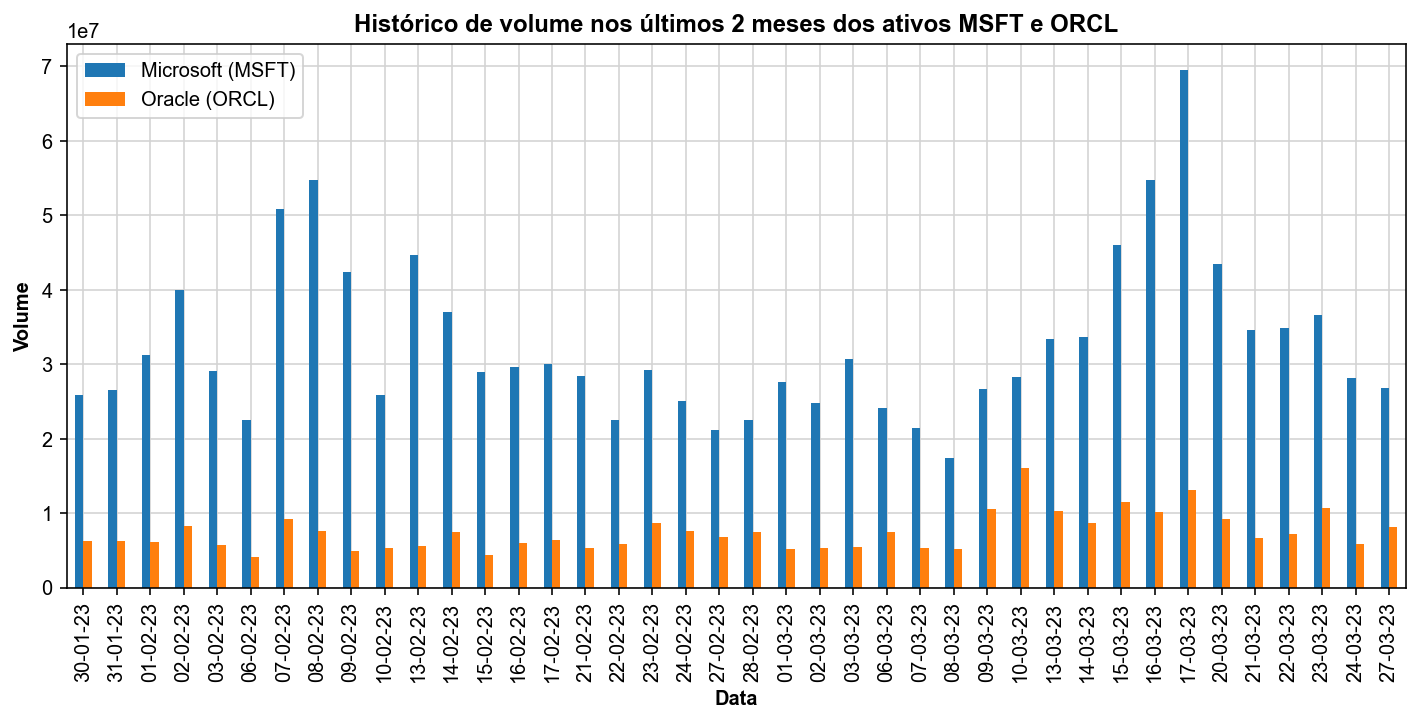

In [8]:
# Histograma de diferença de volume diário para cada ação

ax = df_dif_volume.plot.bar(zorder=2)
plt.rcParams["figure.figsize"] = [12, 5]
plt.title('Histórico de volume nos últimos 2 meses dos ativos MSFT e ORCL', fontweight="bold")
plt.xlabel('Data', fontweight="bold")
plt.ylabel('Volume', fontweight="bold")
plt.legend(['Microsoft (MSFT)','Oracle (ORCL)'])
ax.grid(zorder=0, color='lightgray')
plt.savefig("Pr05_Q01_volume.pdf", format="pdf", bbox_inches="tight")
plt.show()

## Questão 2

In [167]:
#define dados
ticker = "OXY"

#salva os dados em um df e define periodo
df_data = yf.download(ticker, period="2500d")

df_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-04-24,78.426910,81.013672,78.426910,80.793320,57.838104,7712345
2013-04-25,80.084351,84.232758,79.087967,81.962158,58.674854,9961366
2013-04-26,81.818443,83.284279,80.965775,83.025604,59.436131,5896699
2013-04-29,83.705826,84.347725,82.393280,84.175278,60.259182,9771399
2013-04-30,84.692627,86.120140,84.481857,85.516563,61.219368,8174632


In [162]:
df_data["Day"] = pd.to_datetime(df_data.index).strftime("%d")
df_data["Year/Mounth"] = pd.to_datetime(df_data.index).strftime("%y-%m")
df_data["Year"] = pd.to_datetime(df_data.index).strftime("%y")

df_data.tail()

,Open,High,Low,Close,Adj Close,Volume,Day,Year/Mounth,Year
Date,,,,,,,,,
2023-03-21,59.930000,60.750000,59.500000,60.240002,60.240002,16959100,21,23-03,23
2023-03-22,60.290001,60.419998,58.610001,58.680000,58.680000,13936200,22,23-03,23
2023-03-23,59.049999,59.560001,57.689999,58.480000,58.480000,15059300,23,23-03,23
2023-03-24,57.880001,58.599998,57.029999,58.180000,58.180000,13598000,24,23-03,23
2023-03-27,58.700001,59.860001,58.029999,59.650002,59.650002,13496172,27,23-03,23


In [163]:
df_day = df_data[df_data.index.isin(df_data.resample("MS").first().index)]
df_day = df_day.drop(['Open', 'High', 'Low', 'Close', 'Adj Close'], axis=1)

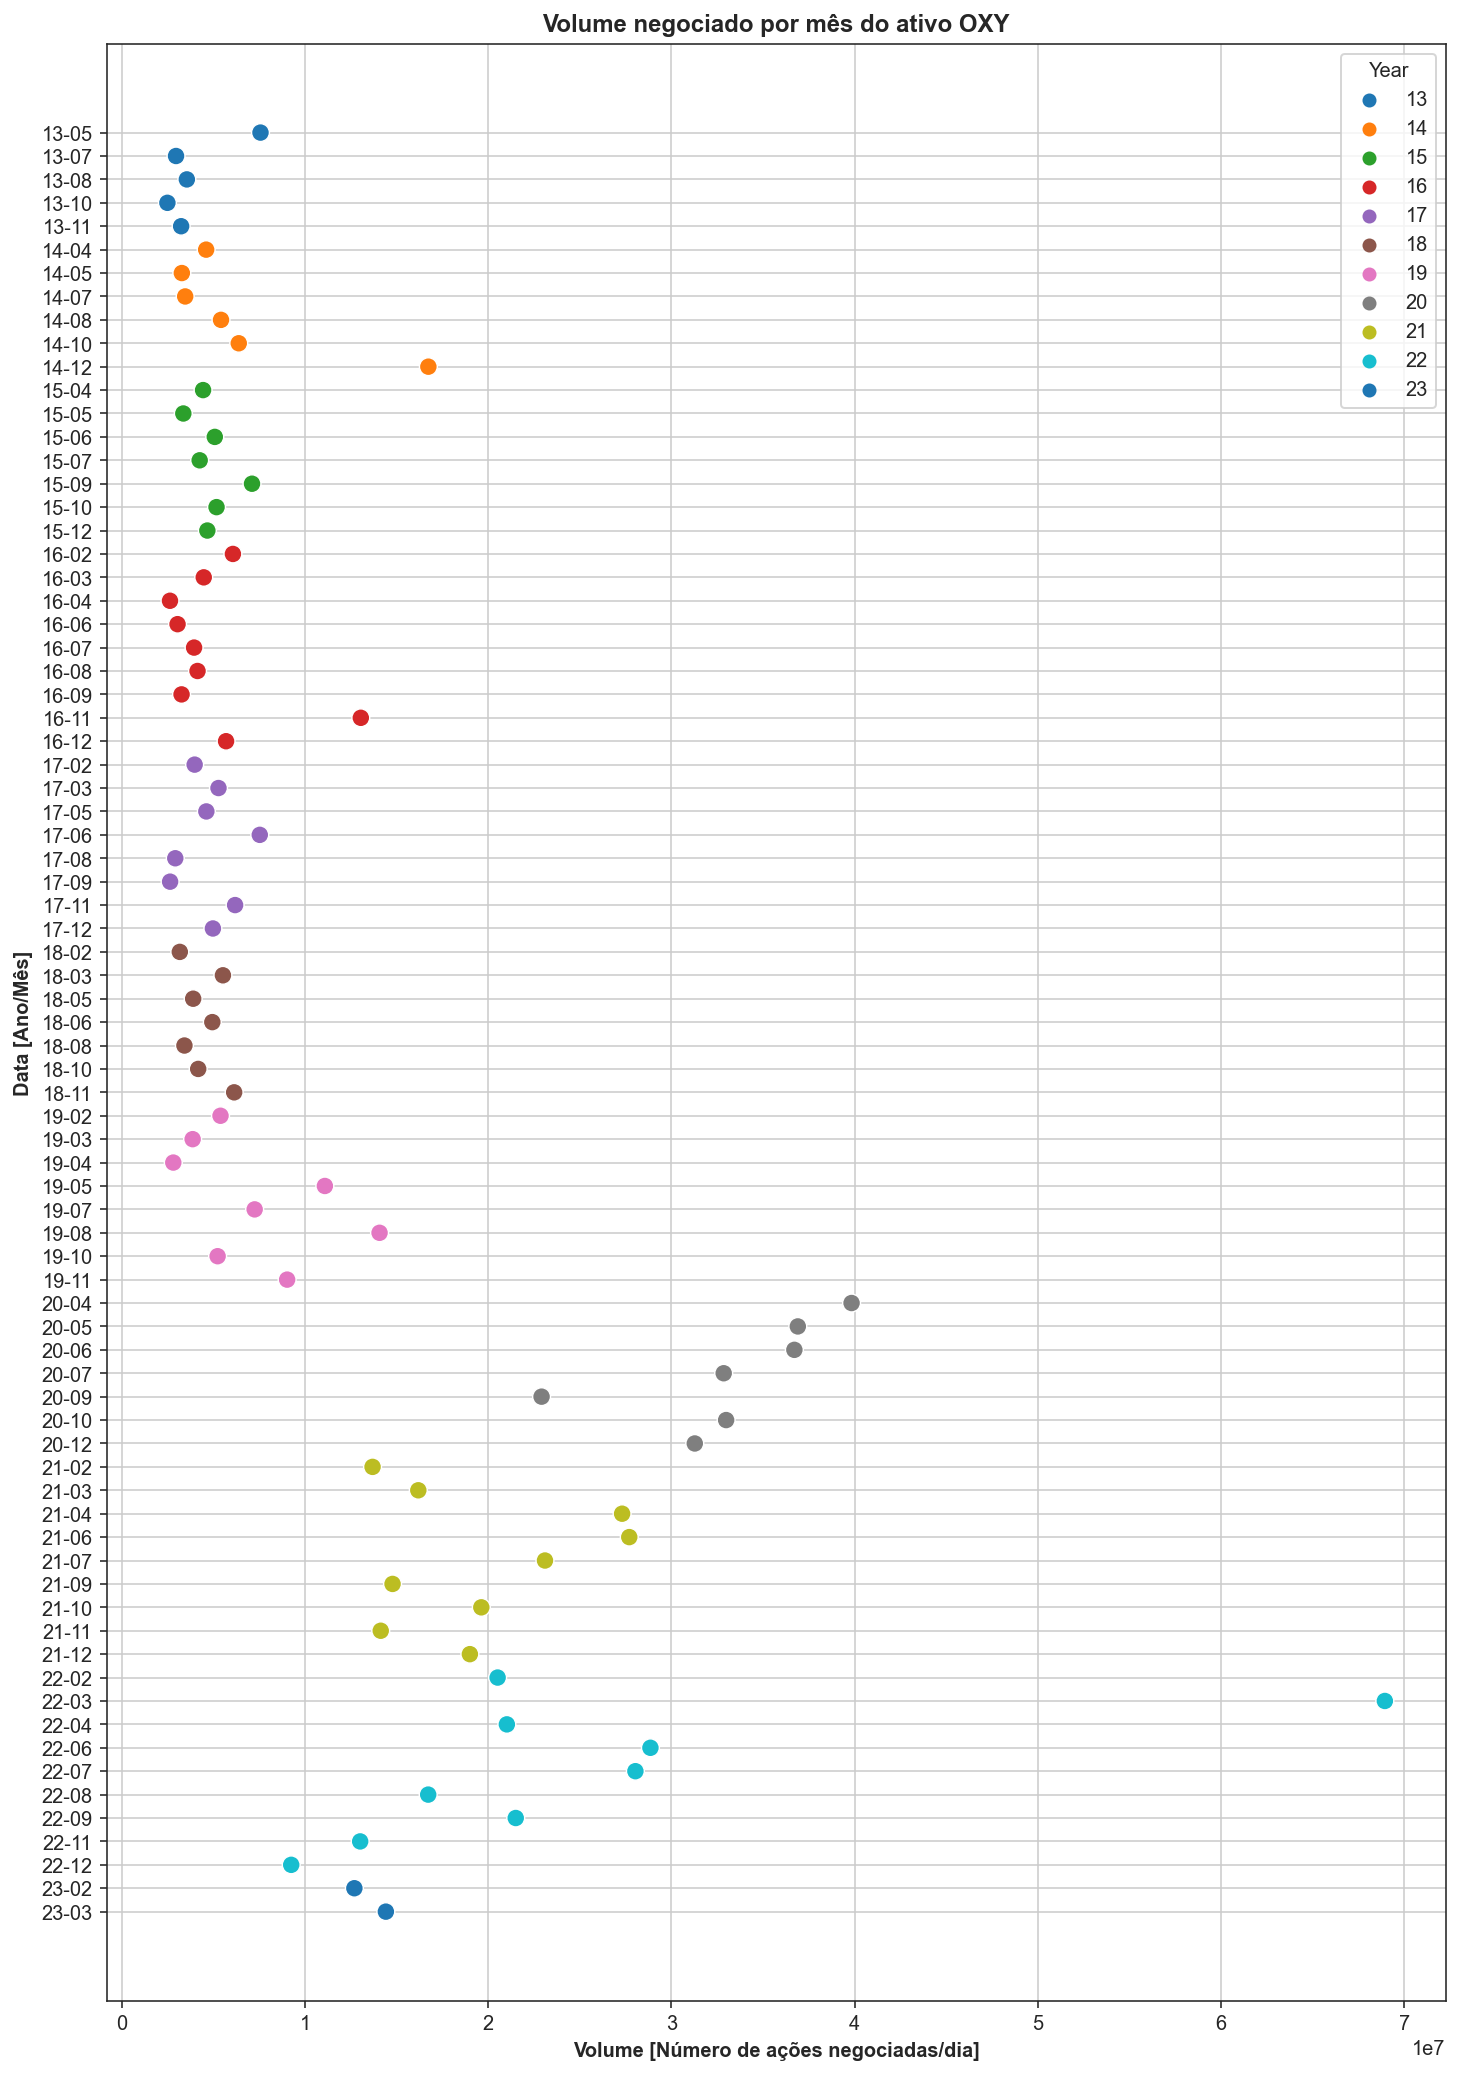

In [164]:
sns.scatterplot(data=df_day, y='Year/Mounth', x='Volume', hue='Year', s=80, palette="tab10")
plt.title("Volume negociado por mês do ativo " + ticker, fontweight="bold")
plt.xlabel("Volume [Número de ações negociadas/dia]", fontweight="bold")
plt.ylabel("Data [Ano/Mês]", fontweight="bold")
plt.rcParams["figure.figsize"] = [12, 18]
plt.savefig("Pr05_Q02_volume_v2.pdf", format="pdf", bbox_inches="tight")
plt.show()

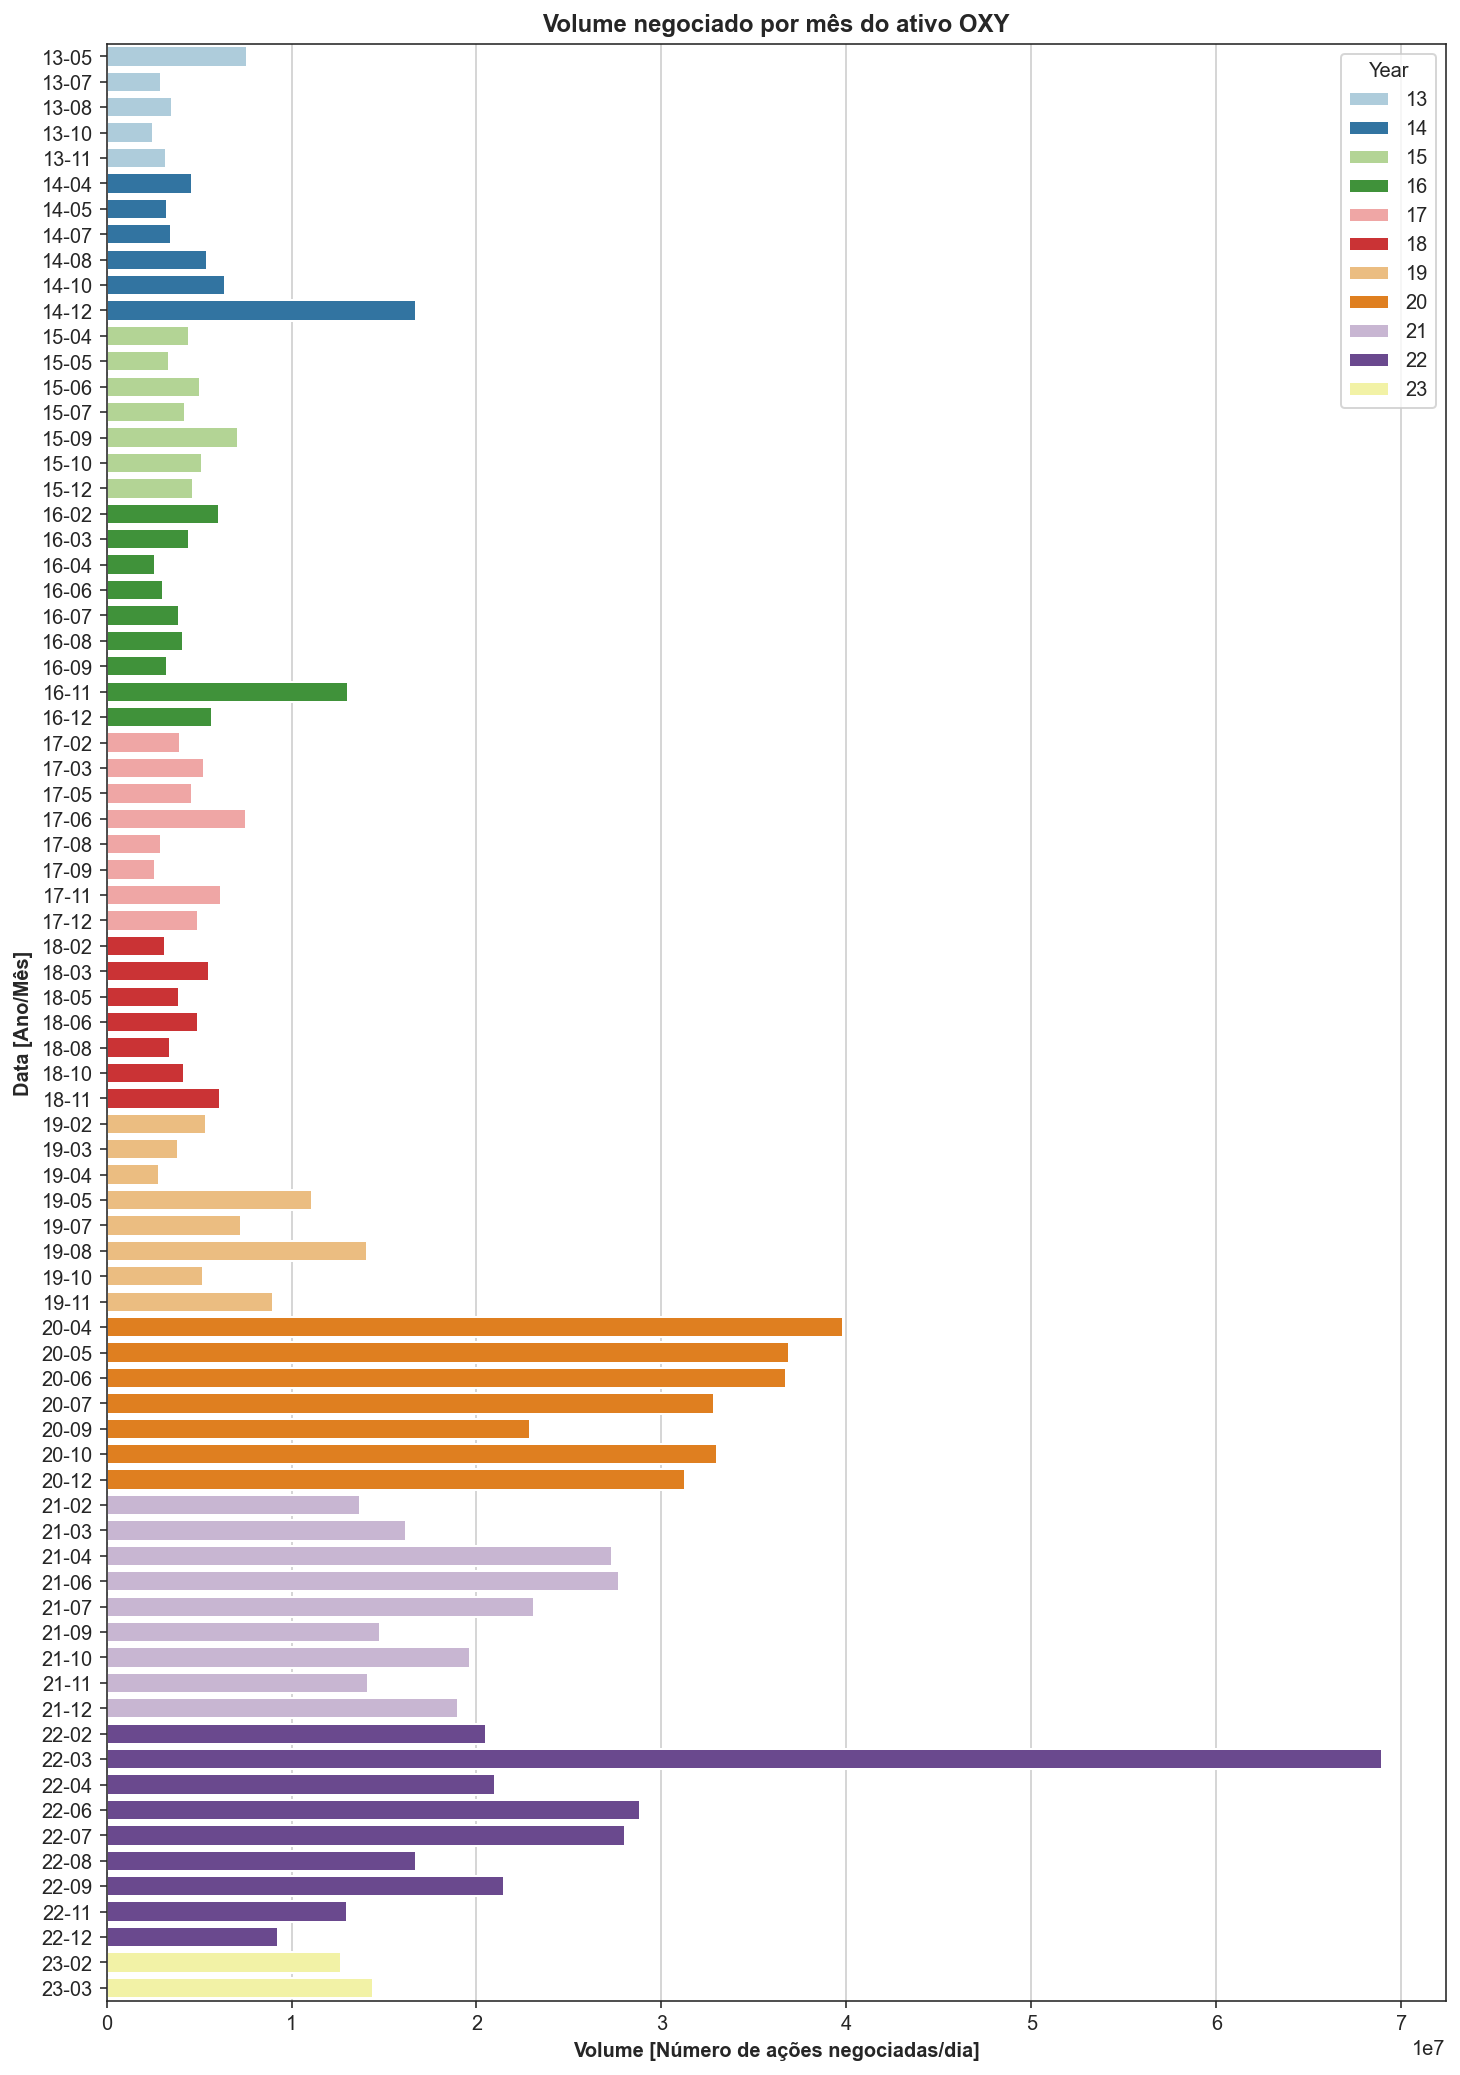

In [191]:
plt.figure(figsize=(12,18))
sns.set_style("ticks",{'axes.grid' : True})
sns.barplot(data=df_day, y='Year/Mounth', x='Volume', hue='Year', dodge=False, palette="Paired")
plt.title("Volume negociado por mês do ativo " + ticker, fontweight="bold")
plt.xlabel("Volume [Número de ações negociadas/dia]", fontweight="bold")
plt.ylabel("Data [Ano/Mês]", fontweight="bold")
plt.savefig("Pr05_Q02_volume_v3.pdf", format="pdf", bbox_inches="tight")
plt.show()

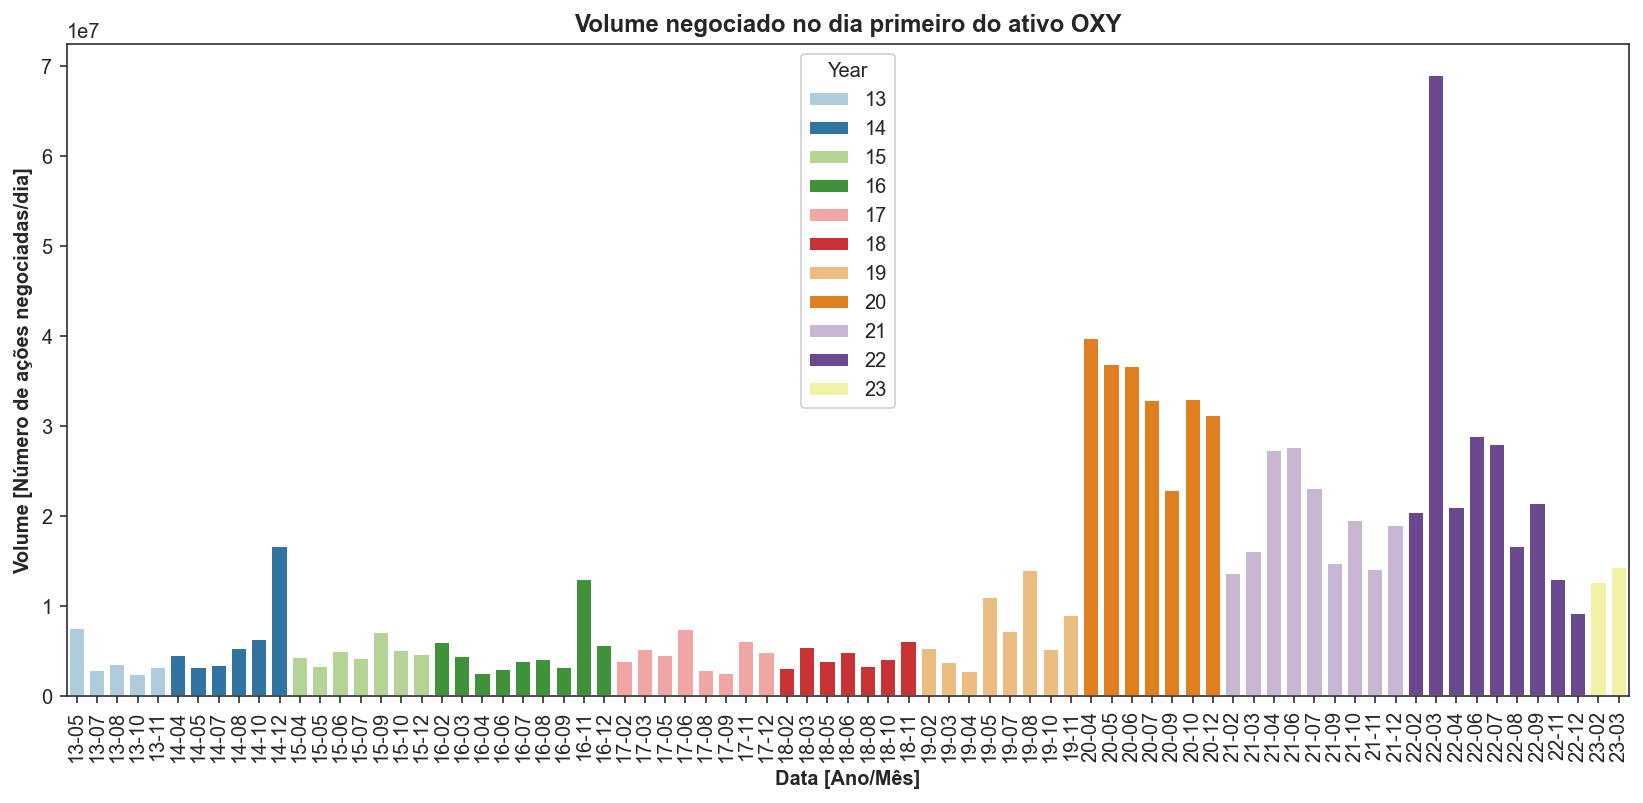

In [193]:
plt.figure(figsize=(14,6))
sns.set_style("ticks",{'axes.grid' : False})
sns.barplot(data=df_day, x='Year/Mounth', y='Volume', hue='Year', dodge=False, palette="Paired")
plt.title("Volume negociado no dia primeiro do ativo " + ticker, fontweight="bold")
plt.ylabel("Volume [Número de ações negociadas/dia]", fontweight="bold")
plt.xlabel("Data [Ano/Mês]", fontweight="bold")
plt.xticks(rotation=90)
plt.show()